
image 1/1 /content/drive/MyDrive/yolo/dataset/sample/a1106/1de8aa76bcb9b306be453114b2009c7c.jpg: 480x640 1 number_plate, 166.3ms
Speed: 3.6ms preprocess, 166.3ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)
Results saved to runs/detect/predict7


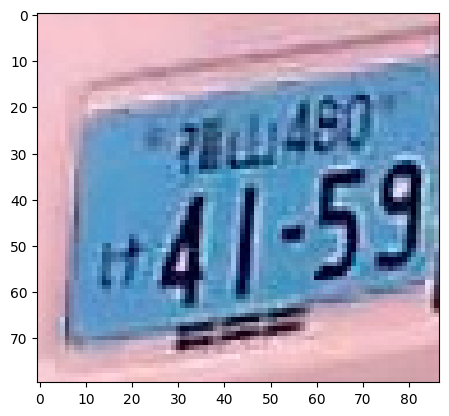

In [15]:
!pip install ultralytics
import os
import matplotlib.pyplot as plt
from ultralytics import YOLO
import cv2
import os

#best.yamlを指していますが、ここはアプリ化の時にbest.yamlの位置は変わると思うので変更してください。
YAML_PATH = "/content/drive/MyDrive/yolo/best.pt"

#入力画像を代入してください。pathをグローバル変数に代入していますが、適宜変更してください。
INPUT_PHOTO_PATH = "/content/drive/MyDrive/yolo/dataset/sample/a1106/1de8aa76bcb9b306be453114b2009c7c.jpg"



class Yolo_numbe_plate_cut:
  def __init__(self):
    pass


  def yolo_cut():
    yaml_path = YAML_PATH
    input_photo_path = INPUT_PHOTO_PATH
    model = YOLO(yaml_path)
    results = model.predict(input_photo_path,save=True, save_crop=True, conf=0.1)
    #runsフォルダが自動生成され、predict->crops->number_plateに切り抜かれた画像がアップロードされる
    #生成された画像の名前は入力された画像の名前と同じになります
cut = Yolo_numbe_plate_cut
cut.yolo_cut()

#切り抜いた画像を表示しているだけです。ディレクトリを明らかにするために書いていますが不要なので以下２行は削除してください。
img = cv2.imread("/content/runs/detect/predict/crops/number_plate/1de8aa76bcb9b306be453114b2009c7c.jpg")
plt.imshow(img)

In [14]:
pip install easyocr

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 14.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.2/307.2 kB 19.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 908.3/908.3 kB 43.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 281.3/281.3 kB 17.4 MB/s eta 0:00:00


In [16]:
import easyocr
import cv2
from PIL import Image,ImageDraw

reader = easyocr.Reader(['ja'])
img_path = "/content/runs/detect/predict/crops/number_plate/1de8aa76bcb9b306be453114b2009c7c.jpg"

image = cv2.imread(img_path)
bounds = reader.readtext(img_path)
for idx in range(len(bounds)):
    res = bounds[idx][0]
    print(res)


# 現在の解像度を確認
height, width = image.shape[:2]
print(f'元の解像度: {width} x {height}')

# 解像度を300dpiに調整
tmp=500 / height
new_height = int(height * tmp)  # 96dpiから300dpiへ
new_width = int(width * tmp)
resized_image = cv2.resize(image, (new_width, new_height))

nimg=cv2.bitwise_not(resized_image)

gimg=cv2.cvtColor(nimg,cv2.COLOR_BGR2GRAY)

ret2, bimg = cv2.threshold(gimg, 0, 255, cv2.THRESH_OTSU)

dimg = cv2.bilateralFilter(bimg, 25, 75, 75)

result2=reader.readtext(dimg)
print(result2)


Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% Complete[[29, 17], [77, 17], [77, 35], [29, 35]]
[[17.13701426866951, 35.46032711047207], [88.25126851029586, 24.669924234287965], [91.86298573133048, 61.53967288952793], [21.748731489704138, 72.33007576571204]]
元の解像度: 87 x 80
[([[175.94608040864426, 135.39510555284824], [469.80498008686664, 96.7796163625251], [476.05391959135574, 196.60489444715176], [181.19501991313336, 236.2203836374749]], 'ル山り町', 0.0075907278805971146), ([[63.97252533716667, 227.0895363099834], [539.5907680452844, 187.75206014336075], [540.0274746628334, 385.91046369001657], [64.40923195471561, 424.2479398566392]], 'ッ41.59', 0.17363908334832762)]
